n*** Successfully loaded .Rprofile ***n
Warning message:
package ‘readr’ was built under R version 4.0.5 

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Rows: 1 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): lang
dbl (12): n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n10p, nf

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): lang
dbl (12): n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n10p, nf

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


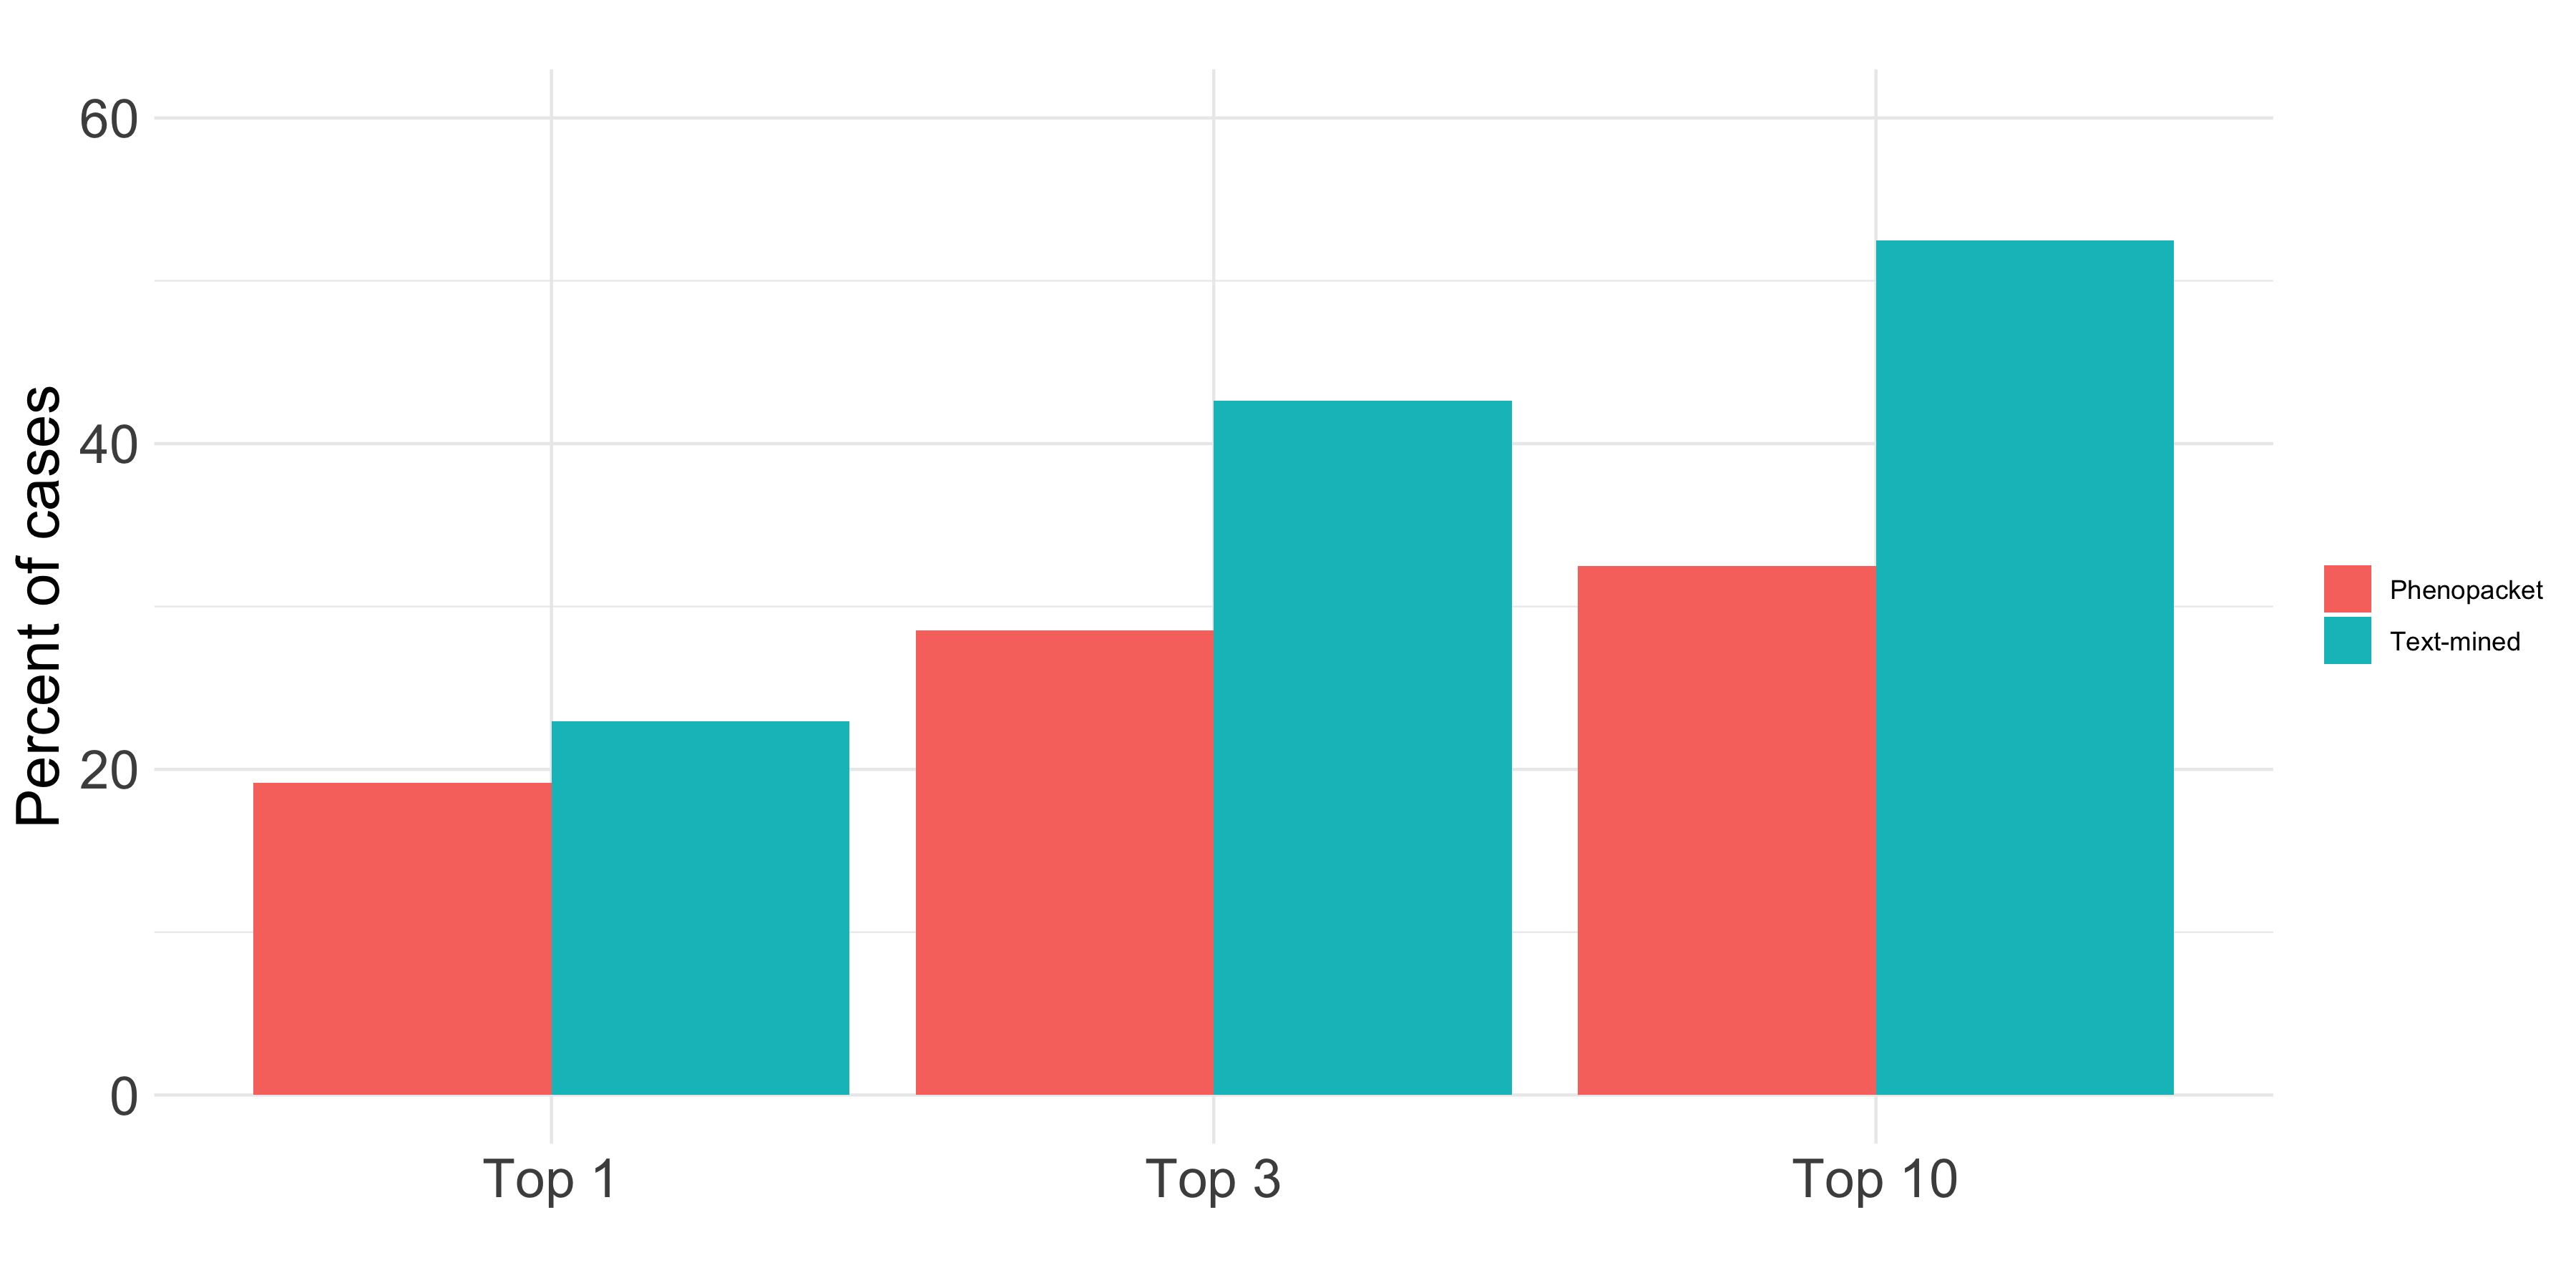

In [18]:
from IPython.display import Image, display
!Rscript ../src/malco/post_process/make_hits_at_n_plot.R ../outputdir_text_mined_2024_07_02/plots/topn_result.tsv ../outputdir_all_2024_07_04/plots/topn_result.tsv ./hit_at_n_plot.png
display(Image(filename='./hit_at_n_plot.png'))

In [8]:
import pandas as pd
import numpy as np

def calculate_rank_percentages(filename):
    # Read the data into a pandas DataFrame
    df = pd.read_csv(filename, sep='\t')

    # Calculate the total number of cases as the sum of all ranks and nf
    total_cases = df.iloc[0, 1:].sum()

    # Calculate the sum of n1, n2, and n3 for the first 1, 3, and 10 ranks
    within_1_rank = df['n1'].sum()
    within_3_ranks = df[['n1', 'n2', 'n3']].sum(axis=1).iloc[0]
    within_10_ranks = df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']].sum(axis=1).iloc[0]

    # Calculate the percentages
    percent_within_1_rank = (within_1_rank / total_cases) * 100
    percent_within_3_ranks = (within_3_ranks / total_cases) * 100
    percent_within_10_ranks = (within_10_ranks / total_cases) * 100

    # Truncate percentages to 3 significant digits
    percent_within_1_rank = np.round(percent_within_1_rank, 1)
    percent_within_3_ranks = np.round(percent_within_3_ranks, 1)
    percent_within_10_ranks = np.round(percent_within_10_ranks, 1)

    # Return the results as a dictionary
    return {
        "filename": filename,
        "Percent within 1 rank": percent_within_1_rank,
        "Percent within 3 ranks": percent_within_3_ranks,
        "Percent within 10 ranks": percent_within_10_ranks
    }

def process_files(file_list):
    results = []
    for file in file_list:
        result = calculate_rank_percentages(file)
        results.append(result)
    
    # Convert the results list to a DataFrame for better display
    results_df = pd.DataFrame(results)
    return results_df

# List of files to process
file_list = ["../outputdir_all_2024_07_04/plots/topn_result.tsv",
             "../outputdir_text_mined_2024_07_02/plots/topn_result.tsv"]  # Replace with your actual file names

# Process the files and display the results
results_df = process_files(file_list)

# Display the DataFrame
results_df

,filename,Percent within 1 rank,Percent within 3 ranks,Percent within 10 ranks
0,../outputdir_all_2024_07_04/plots/topn_result.tsv,19.2,28.6,32.5
1,../outputdir_text_mined_2024_07_02/plots/topn_...,23.0,42.6,52.5
